# Classification Of Hotel Booking

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/-Practice/main/hotel_bookings.csv")
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [3]:
data.shape

(119390, 32)

In [4]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
perc_missing_data = pd.DataFrame([data.isnull().sum(),data.isnull().sum()*100.0/data.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


# 0.003% of rows have missing information for children. Let's look at distribution of children to fill missing information

In [8]:
data['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

# Most bookings had no children and hence we will fill the missing rows for children with value 0

In [9]:
data['children'].fillna(0,inplace=True)

# 0.4% of rows have missing information for country. Let's look at distribution of country to fill missing information

In [10]:
perc_country_data = pd.DataFrame([data['country'].value_counts(),data['country'].value_counts()*100/data.shape[0]]).T
perc_country_data.columns = ['Count', '% Distribution']
perc_country_data

,Count,% Distribution
PRT,48590.0,40.698551
GBR,12129.0,10.159142
FRA,10415.0,8.723511
ESP,8568.0,7.176480
DEU,7287.0,6.103526
...,...,...
DJI,1.0,0.000838
BWA,1.0,0.000838
HND,1.0,0.000838
VGB,1.0,0.000838


# 40.7% of bookings are from Portugal.

In [11]:
data['country'].fillna('PRT',inplace=True)

In [12]:
data.drop(['agent','company'],axis=1,inplace=True)

# Let's confirm all missing data have been handled

In [13]:
perc_missing_data = pd.DataFrame([data.isnull().sum(),data.isnull().sum()*100.0/data.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0


# DATA VISUALIZATION

In [14]:
plt.style.use('fivethirtyeight')

# Let's look at distribution of hotel bookings and separate them by their cancellation status

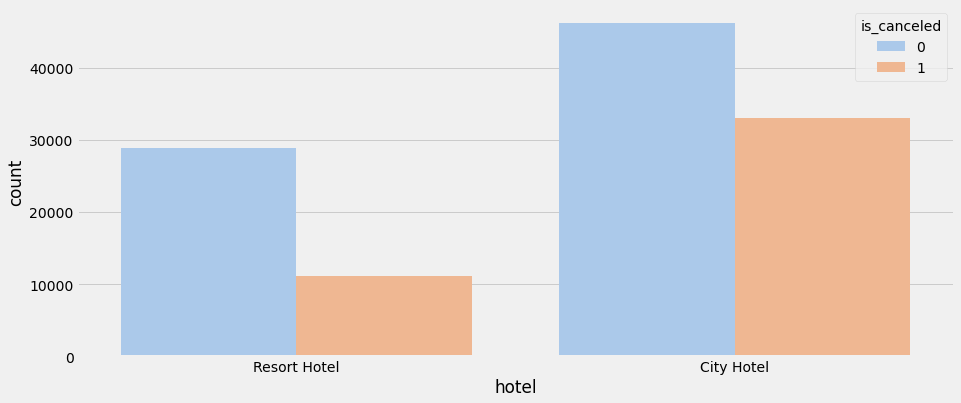

In [15]:
plt.figure(figsize=(14,6))
sns.countplot(x='hotel',data=data,hue='is_canceled',palette='pastel')
plt.show()

# Let's look at deposit type vs cancellation status

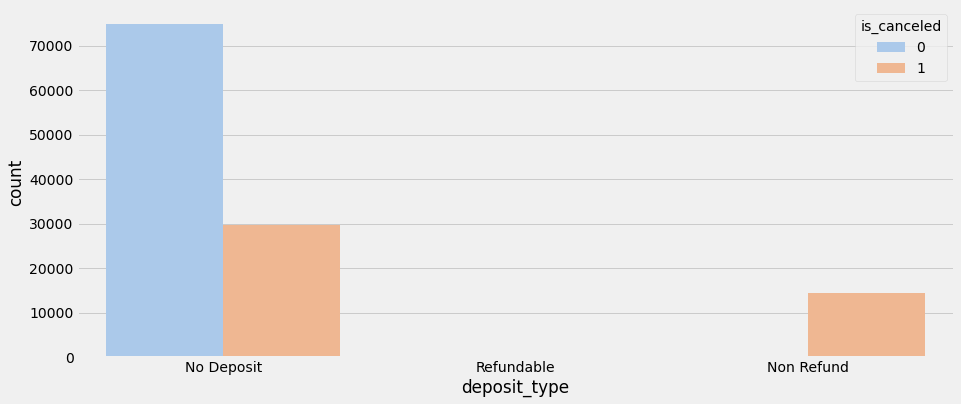

In [16]:
plt.figure(figsize=(14,6))
sns.countplot(x='deposit_type',data=data,hue='is_canceled',palette='pastel')
plt.show()

# Date of Cancellation vs Date of Arrival

In [17]:
data['arrival_date'] = data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str)
data['arrival_date'] = data['arrival_date'].apply(pd.to_datetime)
data['reservation_status_date'] = data['reservation_status_date'].apply(pd.to_datetime)

In [18]:
cancelled_data = data[data['reservation_status'] == 'Canceled']
cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days

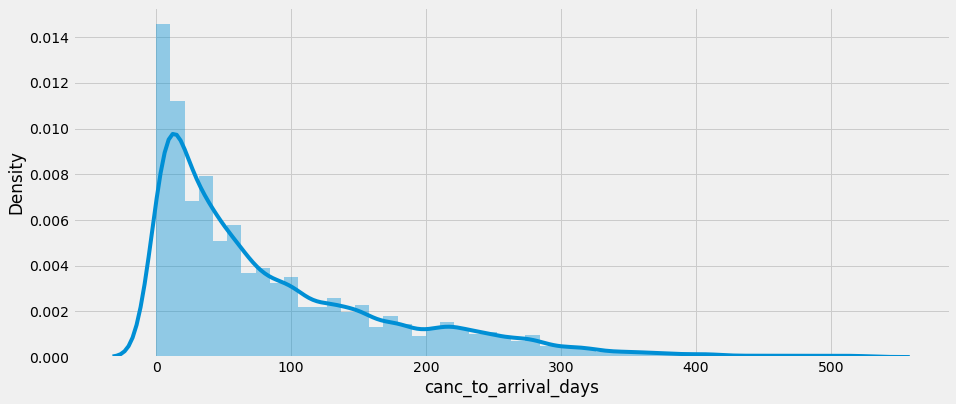

In [19]:
plt.figure(figsize=(14,6))
sns.distplot(cancelled_data['canc_to_arrival_days'])
plt.show()

In [20]:
print('Percentage of cancellations that are within a week of arrival: ', 
      (cancelled_data[cancelled_data['canc_to_arrival_days']<=7]['canc_to_arrival_days'].count()*100/cancelled_data['canc_to_arrival_days'].count()).round(2), '%')

Percentage of cancellations that are within a week of arrival:  11.94 %


# Let's see at what times of the year do we have the highest bookings

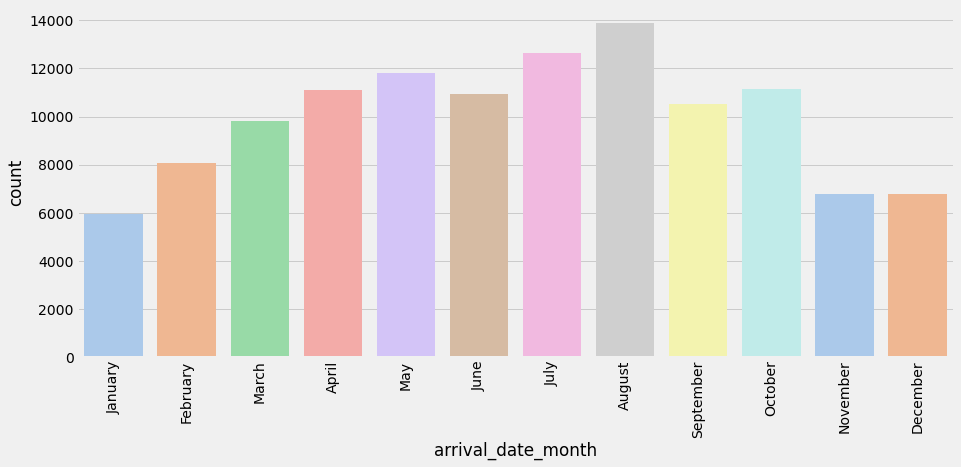

In [21]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(14,6))
sns.countplot(data['arrival_date_month'], palette='pastel', order = month_sorted)
plt.xticks(rotation = 90)
plt.show()

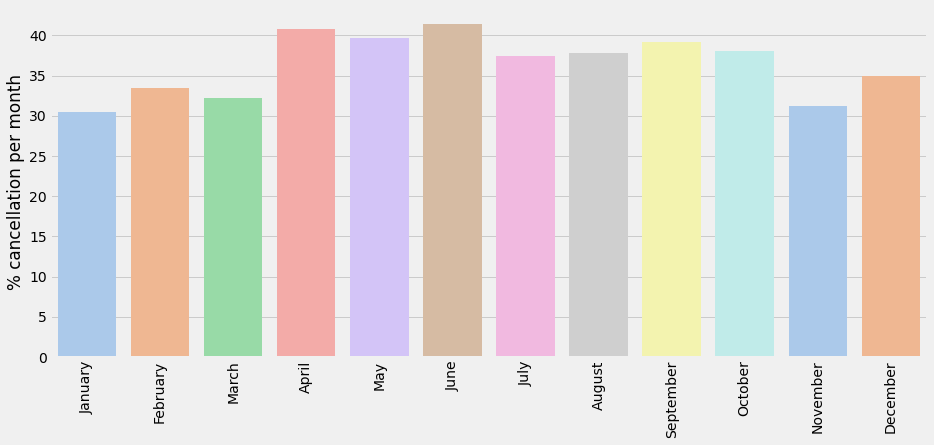

In [22]:
perc_monthly_canc = pd.DataFrame(data[data['is_canceled'] == 1]['arrival_date_month'].value_counts() * 100 / data['arrival_date_month'].value_counts())
perc_monthly_canc.reset_index()
plt.figure(figsize=(14,6))
sns.barplot(x=perc_monthly_canc.index,y='arrival_date_month',data=perc_monthly_canc, order=month_sorted, palette='pastel')
plt.xticks(rotation = 90)
plt.ylabel('% cancellation per month')
plt.show()

# Let's now look at market segment vs cancellation


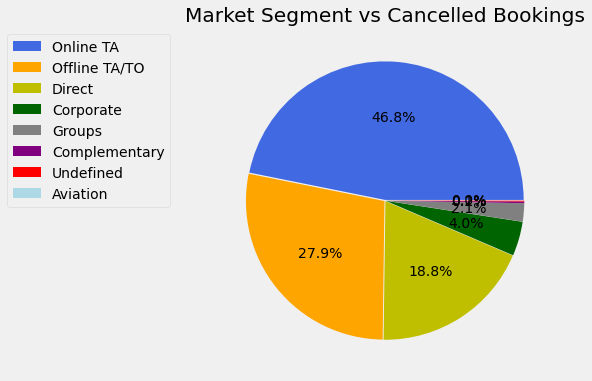

In [23]:
plt.figure(figsize=(8,8))
explode = [0.005] * len(cancelled_data['market_segment'].unique())
colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['market_segment'].value_counts(),
       autopct = '%.1f%%',
       explode = explode,
       colors = colors)
plt.legend(cancelled_data['market_segment'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Market Segment vs Cancelled Bookings')
plt.tight_layout()
plt.show()

About 65% of the cancelled bookings are by travel agents or tour operators

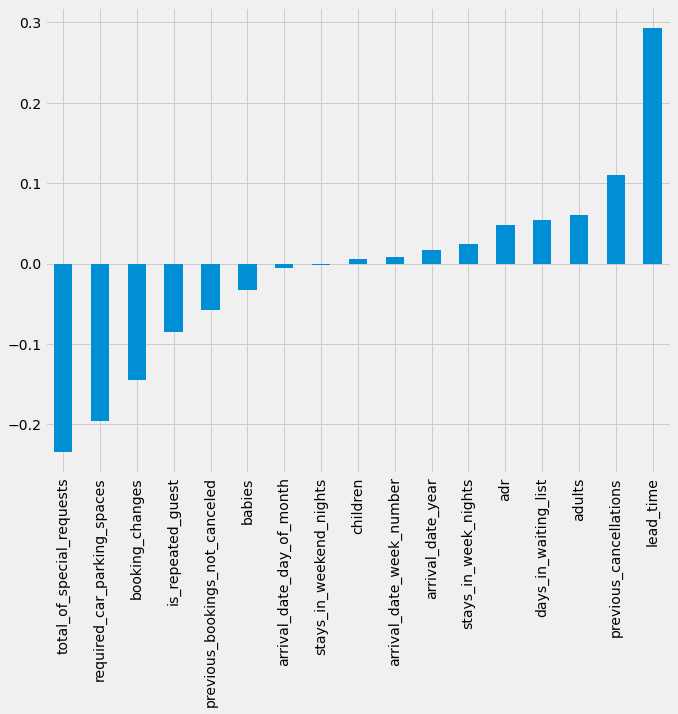

In [24]:
plt.figure(figsize=(10,8))
data.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

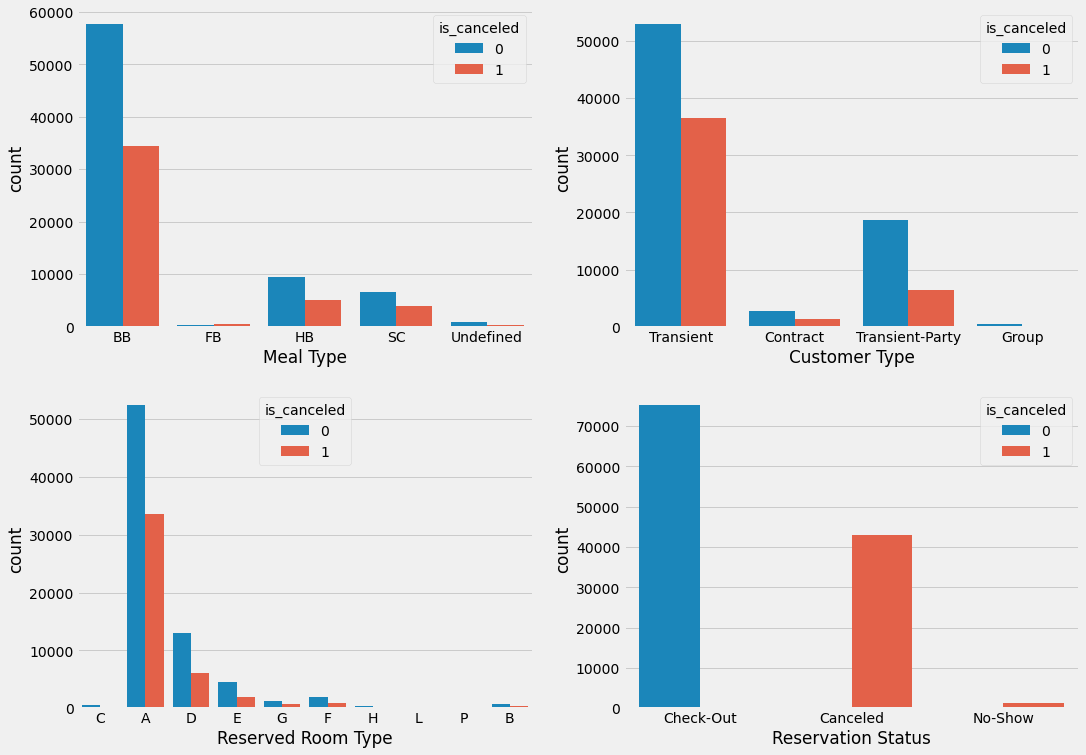

In [25]:
plt.figure(figsize=(16,12))
plt.subplot(221)
sns.countplot(data['meal'], hue=data['is_canceled'])
plt.xlabel('Meal Type')
plt.subplot(222)
sns.countplot(data['customer_type'], hue=data['is_canceled'])
plt.xlabel('Customer Type')
plt.subplot(223)
sns.countplot(data['reserved_room_type'], hue=data['is_canceled'])
plt.xlabel('Reserved Room Type')
plt.subplot(224)
sns.countplot(data['reservation_status'], hue=data['is_canceled'])
plt.xlabel('Reservation Status')
plt.show()

# CONVERTING CATEGORICAL COLUMNS TO DUMMY VARIABLES AND DROPPING UNNECESSARY COLUMNS

In [26]:
data = data.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status','reservation_status_date','arrival_date'], axis=1)
data = pd.concat([data, 
                 pd.get_dummies(data['hotel'], drop_first=True), 
                 pd.get_dummies(data['arrival_date_month'], drop_first=True), 
                 pd.get_dummies(data['market_segment'], drop_first=True),
                 pd.get_dummies(data['distribution_channel'], drop_first=True),
                 pd.get_dummies(data['customer_type'], drop_first=True)
                 ], axis=1)
data = data.drop(['hotel','arrival_date_month','market_segment','distribution_channel','customer_type'], axis=1)

Verifying no categorical variables exist in the dataset

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  int64  
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119390 non-null  float64
 9   babies                          119390 non-null  int64  
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

Let us again look at the correlation of the target variable with rest of the selected features after dummy variable conversion

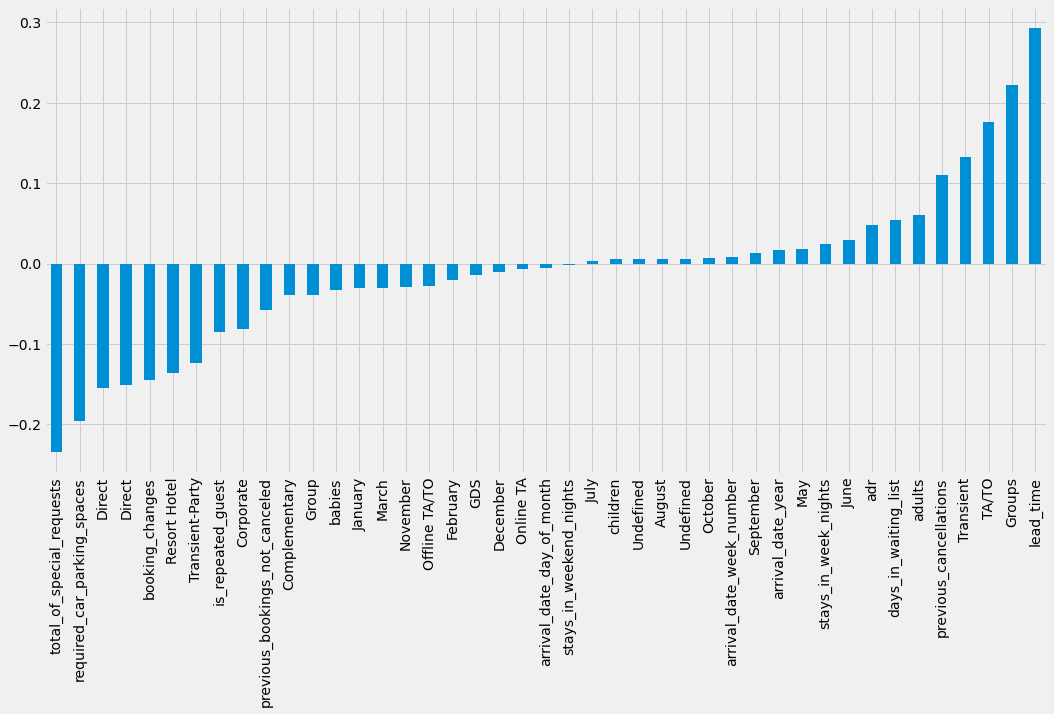

In [28]:
plt.figure(figsize=(16,8))
data.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

# MODELING

In [29]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Empty dictionary of model accuracy results
model_accuracy_results = {}

# Function for calculating accuracy from confusion matrix
from sklearn.metrics import confusion_matrix
def model_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = ((cm[0,0] + cm [1,1]) * 100 / len(y_test)).round(2)
    return accuracy

In [32]:
# Baseline model
(unique, counts) = np.unique(y_train, return_counts=True)
if counts[0]  > counts[1]:
    idx = 0
else:
    idx = 1

# Applying baseline results to y_pred
if idx == 0:
    y_pred = np.zeros(y_test.shape)
else:
    y_pred = np.ones(y_test.shape)

# Computing accuracy
model_accuracy_results['Baseline'] = model_accuracy(y_test, y_pred)

# Logistic Regression

In [33]:
# Fit and train
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=250)
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['LogisticRegression'] = model_accuracy(y_test, y_pred)

# K Nearest Neighbors

In [34]:
# Fit and train
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['KNearestNeighbors'] = model_accuracy(y_test, y_pred)

# SVM

In [35]:
# Fit and train
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=0)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['SVM'] = model_accuracy(y_test, y_pred)

# RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['RandomForest'] = model_accuracy(y_test, y_pred)

Let's visualize the accuracy results

In [37]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

,Accuracy
Baseline,62.42
LogisticRegression,78.56
KNearestNeighbors,81.44
SVM,81.71
RandomForest,85.34


In [38]:
# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,25,50,100,500] , 'criterion': ['entropy', 'gini']}]
randomforestclassifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = randomforestclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'n_estimators': [10, 25, 50, 100, 500]}],
             scoring='accuracy')

In [39]:
print('Best Score: ', grid_search.best_score_.round(2))
print('Best Parameters: ', grid_search.best_params_)

Best Score:  0.86
Best Parameters:  {'criterion': 'gini', 'n_estimators': 500}


RandomForest with new parameters

In [40]:
optimized_classifier = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
optimized_classifier.fit(X_train,y_train)

# Predict
y_pred = optimized_classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['OptimizedRandomForest'] = model_accuracy(y_test, y_pred)

Let's visualize the model accuracy results again with OptimizedRandomForest included

In [41]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

,Accuracy
Baseline,62.42
LogisticRegression,78.56
KNearestNeighbors,81.44
SVM,81.71
RandomForest,85.34
OptimizedRandomForest,86.42


Let's visualize the confusion matrix of the OptimizedRandomForest Model

<AxesSubplot:>

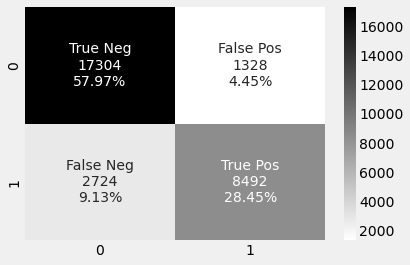

In [42]:
orf_cm = confusion_matrix(y_test, optimized_classifier.predict(X_test))

names = ['True Neg','False Pos','False Neg','True Pos'] # list of descriptions for each group
values = [value for value in orf_cm.flatten()] # list of values for each group
percentages = [str(perc.round(2))+'%' for perc in orf_cm.flatten()*100/np.sum(orf_cm)] # list of percentages for each group
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,values,percentages)] # zip them into list of strings as labels
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(orf_cm, annot=labels, fmt='', cmap='binary')